#### Importownie bibliotek

In [1]:
import pandas as pd
import numpy as np
import pickle

import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV




import ipywidgets as widgets
from IPython.display import display, clear_output

#### Wczytanie dev_df z pliku

In [22]:
#dev_df=pd.read_csv("../dfs/full_df.csv")
dev_df=pd.read_csv("../dfs/dev_df.csv")

dev_df_ok = dev_df[dev_df['state'] == 0]

# dla full x_dev=dev_df.drop(['Unnamed: 0','pledged_in_usd','percentage_of_money_collected','backers', 'state'], axis=1)

x_dev=dev_df.drop(['pledged_in_usd','percentage_of_money_collected','backers', 'state'], axis=1)#[dev_df['goal_in_usd'] <= 1000000]

y_dev=dev_df['state']#[dev_df['goal_in_usd'] <= 1000000]

#### Reprezentacja x i y 

In [23]:
x_dev.head()

,main_cat_cat,country,duration,currency,goal_in_usd
0,80,21,30,13,500.00
1,54,7,30,5,3315.48
2,0,21,31,13,18000.00
3,154,21,45,13,60000.00
4,159,21,45,13,75000.00


In [24]:
y_dev.head()

0    1
1    0
2    1
3    0
4    0
Name: state, dtype: int64

In [38]:
print(x_dev.shape)
print(y_dev.shape)

(36824, 5)
(36824,)


#### Podział próbek na treningowe i testowe

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_dev, y_dev, test_size=0.2, random_state = 28)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(29459, 5)
(7365, 5)
(29459,)
(7365,)


In [40]:
x_train['goal_in_usd'].describe()

count    2.945900e+04
mean     4.753571e+04
std      1.143955e+06
min      7.200000e-01
25%      2.000000e+03
50%      5.537100e+03
75%      1.600000e+04
max      1.040572e+08
Name: goal_in_usd, dtype: float64

In [41]:
y_train.describe()

count    29459.000000
mean         0.360026
std          0.480016
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: state, dtype: float64

#### Podanie parametrów do xgb.XGBRegressor

In [10]:
# params= {'objective': 'reg:squarederror'}

#### Wyliczenie modelu xgb.XGBRegressor

In [11]:
# %%time
# def test(params):
#     model = xgb.XGBRegressor(**params)
#     model.fit(x_train,y_train)
#     y_pred = model.predict(x_test)
    
#     mse = mean_squared_error(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2score = r2_score(y_test, y_pred)
#     score = model.score(x_test,y_test)
    
#     return mse, mae, r2score, score, model

#### Wyniki

In [14]:
Saved = []

In [42]:
dm_train = xgb.DMatrix(x_train,y_train)
dm_test = xgb.DMatrix(x_test,y_test)

In [12]:


params3 = {"objective":"reg:squarederror", 'learning_rate': 0.2, "max_depth":5, 'min_child_weight':1, "booster":"gbtree", 'gamma': 0,'reg_alpha' : 0, 
           'importance_type':'gain','reg_lambda' : 1,'num_parallel_tree': 1, "n_jobs" : 4}
boosts3 = {"n_rounds":100}



def run_model3(button):
    #global time_model3
    #time_model3 = %timeit -n1 -r1 -o xgb.train(params3, dm_train, num_boost_round=boosts3['n_rounds'] )
    #global model3
    t0=time.time()

    model3 = xgb.train(params3, dm_train, num_boost_round=boosts3['n_rounds'])
    tend = time.time()


    preds3 = model3.predict(dm_test)
    predsTrain3 = model3.predict(dm_train)
    global R2_score3
    R2_score3 = r2_score(y_test, preds3)
    #global mae3
    mae3 = mean_absolute_error(y_test,preds3)
    #global mse3
    mse3 = mean_squared_error(y_test, preds3)

    global score3train
    score3train = r2_score(y_train, predsTrain3)
    global train_time
    train_time = tend - t0


    #print(f'\nmodel3 train time = {time_model3.average} s')
    print(f'model3 score R2: {R2_score3}')
    print(f'model3 mean average error: {mae3}')
    print(f'model3 mean squared error: {mse3}')
    print(f'model TRAIN R2 score: {score3train}')
    print(f'Training time: {train_time}')
    
    #print('\n',model3cv)
    
def cv_model3(button):
    cvt0=time.time()

    model3cv = xgb.cv(params3, dm_train, num_boost_round=boosts3['n_rounds'], nfold=4, metrics=['mae','rmse'] )
    cvtend = time.time()
    
    rmse_val_train = model3cv['train-rmse-mean'].to_numpy()
    rmse_val_test = model3cv['test-rmse-mean'].to_numpy()
    
    mae_val_train = model3cv['train-mae-mean'].to_numpy()
    mae_val_test = model3cv['test-mae-mean'].to_numpy()
    
    
    plt.figure(figsize=(25,10))
    plt.subplot(1,2,2)
    plt.plot(mae_val_train)
    plt.plot(mae_val_test)
    plt.legend(['TRAIN MAE','TEST MAE'])
    #plt.show()
    
    plt.subplot(1,2,1)
    plt.plot(rmse_val_train)
    plt.plot(rmse_val_test)
    plt.legend(['TRAIN RMSE','TEST RMSE'])
    plt.show()


/home/bartosz/miniconda3/envs/ml_course/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [13]:
run_model_button = widgets.Button(description="Run Model 3")
run_model_button.on_click(run_model3)


cv_model_button = widgets.Button(description="Check CV (4-fold)")
cv_model_button.on_click(cv_model3)

######## number of boost rounds
boost_slider = widgets.IntSlider(100,10,50000,10)
boost_num = widgets.HBox([widgets.Label('Number of boost rounds:'),boost_slider])

######## number of parallel_trees

forest_slider = widgets.IntSlider(1,1,100)
forest_num = widgets.HBox([widgets.Label('Number of trees in forest:'),forest_slider])


####### learning_rate slider
learning_rate_slider = widgets.FloatSlider(value = 0.2, min = 0.01, max = 1.0, step = 0.01)
learnig_rate = widgets.HBox([widgets.Label('Learning rate (eta):'),learning_rate_slider])


######## tree depth
depth_slider = widgets.IntSlider(5,1,20,1)
depth = widgets.HBox([widgets.Label('Depth of single tree :'),depth_slider])

######## min_child_weight
child_slider = widgets.IntSlider(1,1,50,1)
min_child = widgets.HBox([widgets.Label('min child weight :'),child_slider])

######### booster type dropdown
boosters_list = ['gbtree','dart','linear']
booster_choice = widgets.Dropdown(options=boosters_list)
booster_menu = widgets.HBox([widgets.Label('Choose booster:'),booster_choice])


####### gamma slider
gamma_slider = widgets.FloatSlider(value = 0, min = 0.00, max = 20.0, step = 0.01)
gamma = widgets.HBox([widgets.Label('Gamma:'),gamma_slider])


####### alpha slider
alpha_slider = widgets.FloatSlider(value = 0, min = 0.00, max = 50.0, step = 0.01)
alpha_reg = widgets.HBox([widgets.Label('L1 Regularization (Alpha):'),alpha_slider])

####### lambda slider
lambda_slider = widgets.FloatSlider(value = 1.0, min = 0.00, max = 50.0, step = 0.01)
lambda_reg = widgets.HBox([widgets.Label('L2 Regularization (Lambda):'),lambda_slider])

######### booster type dropdown
importance_list = ["gain", "weight", "cover", "total_gain", "total_cover"]
importance_choice = widgets.Dropdown(options=importance_list)
importance_menu = widgets.HBox([widgets.Label('importance_type:'),importance_choice])



def params3_updater(button):
    boosts3['n_rounds'] =           boost_slider.value
    boosts3['num_parallel_tree'] =  forest_slider.value
    
    params3["booster"] =            booster_choice.value
    params3["learning_rate"] =      learning_rate_slider.value
    params3["max_depth"] =          depth_slider.value
    params3['min_child_weight'] =   child_slider.value
    params3["gamma"] =              gamma_slider.value
    params3["reg_lambda"] =         lambda_slider.value
    params3["reg_alpha"] =          alpha_slider.value
    params3['importance_type'] =    importance_choice.value
    clear_output()
    run_gui()
    print('Boost rounds:  ',boosts3['n_rounds'],', Other parameters: ',params3)
    
update_button = widgets.Button(description="Update params")
update_button.on_click(params3_updater)


def save_params(button):
    Saved.append({'ID': len(Saved),
                  'SCORE': R2_score3 ,
                  'TRAIN SCORE':score3train,
                  'TrAIN TIME' : train_time,
                  'num_parallel_tree':params3["num_parallel_tree"],
                  'n_rounds': boosts3['n_rounds'],
                  "booster": params3["booster"],
                  "learning_rate":params3["learning_rate"],
                  "max_depth":params3["max_depth"],
                  'min_child_weight':params3['min_child_weight'],
                  'gamma':params3["gamma"],
                  'reg_lambda':params3["reg_lambda"],
                  'reg_alpha':params3["reg_alpha"],
                  'importance_type':params3['importance_type']
                 })
    print('saved!')

save_button = widgets.Button(description="Save params and score")
save_button.on_click(save_params)

def show_Saved(button):
    clear_output()
    run_gui()
    for el in Saved:
        print(el)

show_button = widgets.Button(description="Show saved")
show_button.on_click(show_Saved)



def restore_saved(button):
    n = restore_number.value
    boosts3['n_rounds'] = Saved[n]['n_rounds']
    params3["booster"] = Saved[n]['booster']
    params3["num_parallel_tree"] = Saved[n]['num_parallel_tree']
    params3["learning_rate"] = Saved[n]['learning_rate']
    params3["max_depth"] = Saved[n]['max_depth']
    params3['min_child_weight'] = Saved[n]['min_child_weight']
    params3["gamma"] = Saved[n]['gamma']
    params3["reg_lambda"] = Saved[n]['reg_lambda']
    params3["reg_alpha"] = Saved[n]['reg_alpha']
    params3['importance_type'] = Saved[n]['importance_type']
    
    boost_slider.value          = Saved[n]['n_rounds'] 
    booster_choice.value        = Saved[n]['booster']
    forest_slider.value         = Saved[n]['num_parallel_tree']
    learning_rate_slider.value  = Saved[n]['learning_rate']
    depth_slider.value          = Saved[n]['max_depth']
    child_slider.value          = Saved[n]['min_child_weight']
    gamma_slider.value          = Saved[n]['gamma']
    lambda_slider.value         = Saved[n]['reg_lambda']
    alpha_slider.value          = Saved[n]['reg_alpha']
    importance_choice.value     = Saved[n]['importance_type']
    clear_output()
    run_gui()
    print('Boost rounds:  ',boosts3['n_rounds'],', Other parameters: ',params3)
    
restore_number = widgets.IntText(0)    

restore_button = widgets.Button(description="Restore saved")
restore_button.on_click(restore_saved)
    
def set_best_random(button):
    boosts3['n_rounds'] =          xgbr_search.best_params_['n_estimators']
    params3["booster"] =           xgbr_search.best_params_['booster']
    params3["num_parallel_tree"] = xgbr_search.best_params_['num_parallel_tree']
    params3["learning_rate"] =     xgbr_search.best_params_['learning_rate']
    params3["max_depth"] =         xgbr_search.best_params_['max_depth']
    params3['min_child_weight'] =  xgbr_search.best_params_['min_child_weight']
    params3["gamma"] =             xgbr_search.best_params_['gamma']
    params3["reg_lambda"] =        xgbr_search.best_params_['reg_lambda']
    params3["reg_alpha"] =         xgbr_search.best_params_['reg_alpha']
    
    boost_slider.value          = xgbr_search.best_params_['n_estimators'] 
    booster_choice.value        = xgbr_search.best_params_['booster']
    forest_slider.value         = xgbr_search.best_params_['num_parallel_tree']
    learning_rate_slider.value  = xgbr_search.best_params_['learning_rate']
    depth_slider.value          = xgbr_search.best_params_['max_depth']
    child_slider.value          = xgbr_search.best_params_['min_child_weight']
    gamma_slider.value          = xgbr_search.best_params_['gamma']
    lambda_slider.value         = xgbr_search.best_params_['reg_lambda']
    alpha_slider.value          = xgbr_search.best_params_['reg_alpha']
    clear_output()
    run_gui()
    print('Boost rounds:  ',boosts3['n_rounds'],', Other parameters: ',params3)

best_random_button = widgets.Button(description="Use best found random")
best_random_button.on_click(set_best_random)

######## GUI ##########

def run_gui():
    display('SELECT MODEL PARAMETERS')
    display(booster_menu,forest_num,boost_num,learnig_rate,depth,min_child,gamma,lambda_reg,alpha_reg,importance_menu)

    display(widgets.HBox([update_button,run_model_button,save_button,show_button]))
    display(widgets.HBox([restore_number, restore_button, cv_model_button]))
    display(widgets.HBox([best_random_button]))



    

run_gui()

'SELECT MODEL PARAMETERS'

Boost rounds:   100 , Other parameters:  {'objective': 'reg:squarederror', 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'booster': 'gbtree', 'gamma': 0.0, 'reg_alpha': 0.0, 'importance_type': 'gain', 'reg_lambda': 1.0, 'num_parallel_tree': 1, 'n_jobs': 4}
model3 score R2: 0.00031831225682232844
model3 mean average error: 13789.544790520924
model3 mean squared error: 16728852545.867102
model TRAIN R2 score: 0.5257688366354363
Training time: 1.2647864818572998


In [126]:
#{'main_cat_cat': LabelEncoder(), 'country': LabelEncoder(), 'currency': LabelEncoder(), 'state': LabelEncoder()}


## randomSearch CV

/home/bartosz/miniconda3/envs/ml_course/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


{'reg_lambda': 0.2, 'reg_alpha': 1.6, 'objective': 'reg:squarederror', 'num_parallel_tree': 10, 'n_estimators': 380, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.4, 'gamma': 2.8000000000000003, 'booster': 'gbtree'}
test score:  0.06086272281170316 




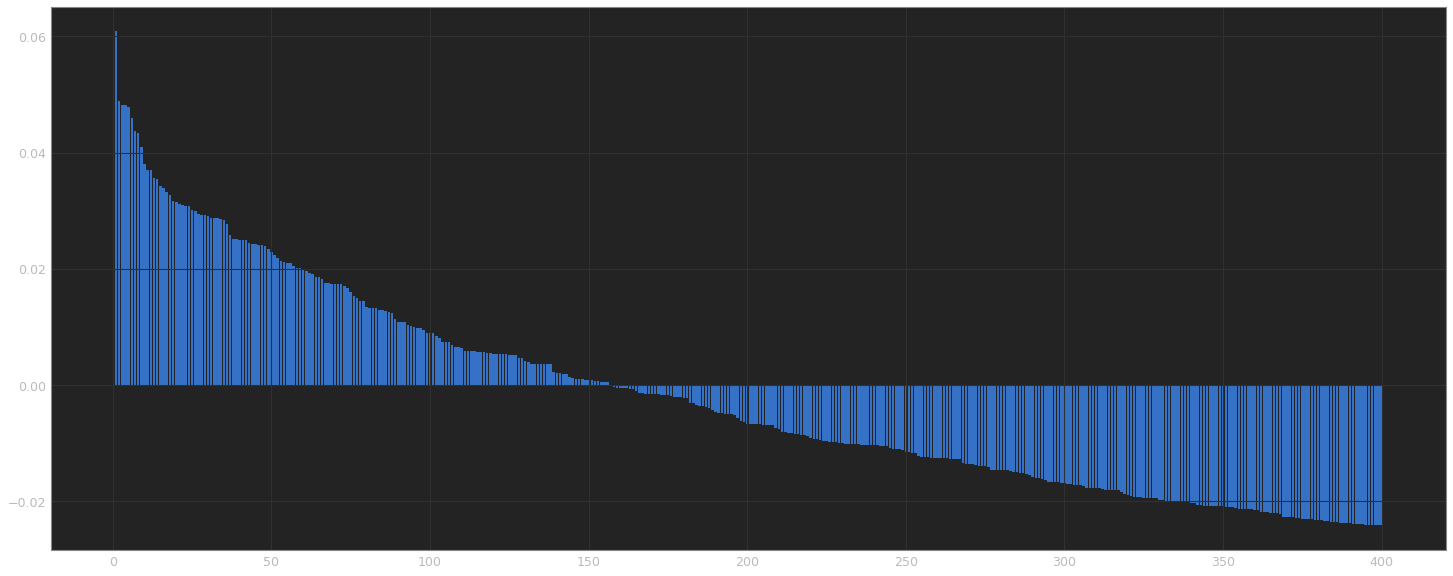

In [20]:
#Xgbreg = xgb.XGBRegressor()
Xgbreg = xgb.XGBRFRegressor()

paramsRS = {"objective":["reg:squarederror"], 
            "n_estimators": range(20,2000,40),
             'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.07,0.08,0.1,0.12,0.15,0.15,0.2,0.22,0.25,0.27,0.3,0.35,0.4],
             "max_depth":range(2,8), 
             'min_child_weight':range(1,4,1), 
             "booster":["gbtree"],
             'gamma': np.arange(0.0,4,0.2),
             'reg_alpha' : np.arange(0.0,2,0.1), 
             'reg_lambda' : np.arange(0.0,3,0.1),
             'num_parallel_tree': [1,2,3,5,8,10,15,20,40,80]}
            

xgbrf_search = RandomizedSearchCV(Xgbreg, param_distributions = paramsRS, cv= 4, n_iter= 400, n_jobs = 4)
xgbrf_search.fit(x_train,y_train)
print(xgbrf_search.best_params_)

print('test score: ',xgbrf_search.best_score_,'\n\n')

plt.figure(figsize=(25,10))
plt.bar(xgbrf_search.cv_results_['rank_test_score'],xgbrf_search.cv_results_['mean_test_score'], data=xgbrf_search.cv_results_['mean_fit_time'])
plt.grid(True)
plt.show()

In [19]:
plt.figure(figsize=(25,10))
plt.bar(xgbr_search.cv_results_['rank_test_score'],xgbr_search.cv_results_['mean_test_score'])

for i in range(0,len(xgbr_search.cv_results_['rank_test_score'])-1,1):
    score = xgbr_search.cv_results_['mean_test_score'][xgbr_search.cv_results_['rank_test_score'][i]]
    text = round(xgbr_search.cv_results_['mean_test_score'][xgbr_search.cv_results_['rank_test_score'][i]],2)
    plt.text(x = i , y=score ,s = text , size = 15)
plt.grid(True)
plt.show()


AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'

<Figure size 1800x720 with 0 Axes>

{'reg_lambda': 2.4000000000000004, 'reg_alpha': 1.1, 'objective': 'reg:squarederror', 'num_parallel_tree': 20, 'n_estimators': 1540, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 0.8, 'booster': 'gbtree'}
test score:  -0.038842346146786 




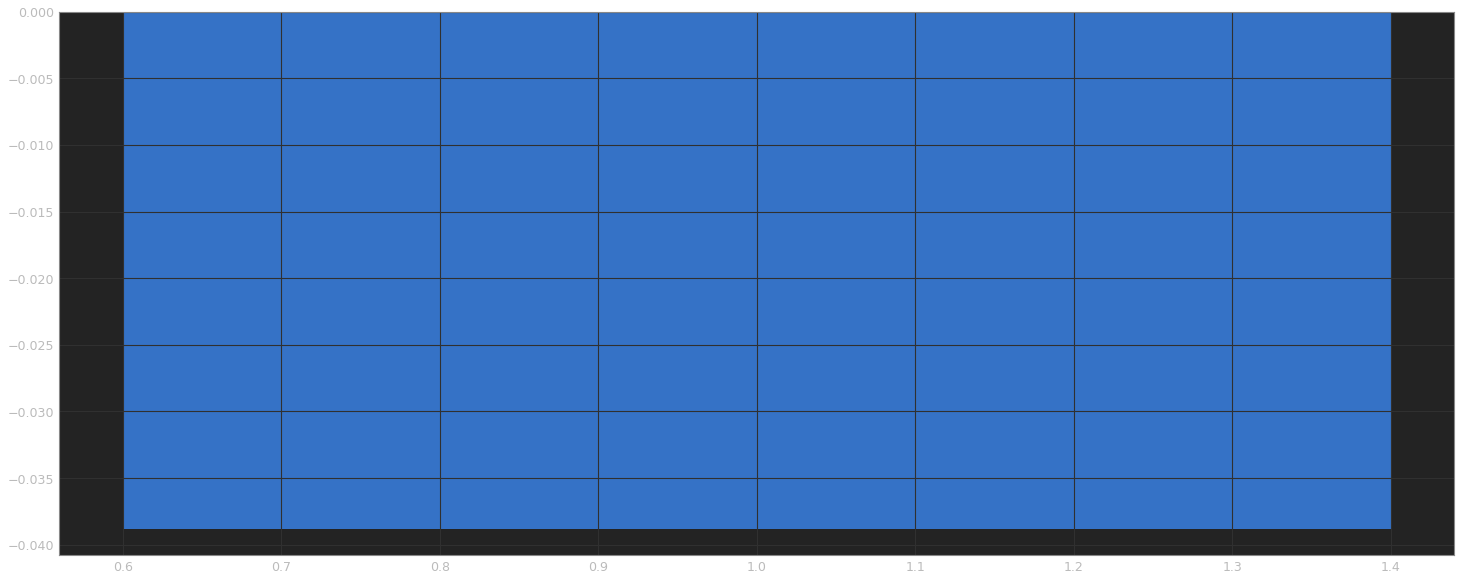

CPU times: user 13.6 s, sys: 30.7 ms, total: 13.6 s
Wall time: 29.5 s


In [31]:
%%time
#Xgbreg = xgb.XGBRegressor()
Xgbreg = xgb.XGBRFRegressor()

paramsRS = {"objective":["reg:squarederror"], 
            "n_estimators": range(20,2000,40),
             'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.07,0.08,0.1,0.12,0.15,0.15,0.2,0.22,0.25,0.27,0.3,0.35,0.4],
             "max_depth":range(2,8), 
             'min_child_weight':range(1,4,1), 
             "booster":["gbtree"],
             'gamma': np.arange(0.0,4,0.2),
             'reg_alpha' : np.arange(0.0,2,0.1), 
             'reg_lambda' : np.arange(0.0,3,0.1),
             'num_parallel_tree': [1,2,3,5,8,10,15,20,40,80]}
            

xgbr_search = RandomizedSearchCV(Xgbreg, param_distributions = paramsRS, cv= 4, n_iter= 1, n_jobs = 4)
xgbr_search.fit(x_train,y_train)
print(xgbr_search.best_params_)

print('test score: ',xgbr_search.best_score_,'\n\n')

plt.figure(figsize=(25,10))
plt.bar(xgbr_search.cv_results_['rank_test_score'],xgbr_search.cv_results_['mean_test_score'], data=xgbr_search.cv_results_['mean_fit_time'])
plt.grid(True)
plt.show()

In [154]:
xgbr_search.cv_results_
len(xgbr_search.cv_results_['rank_test_score'])-1
range(0,len(xgbr_search.cv_results_['rank_test_score'])-1)
xgbr_search.cv_results_['rank_test_score'][1]

11

# klasyfikator

[21:37:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{}
test score:  0.06911486720901455 




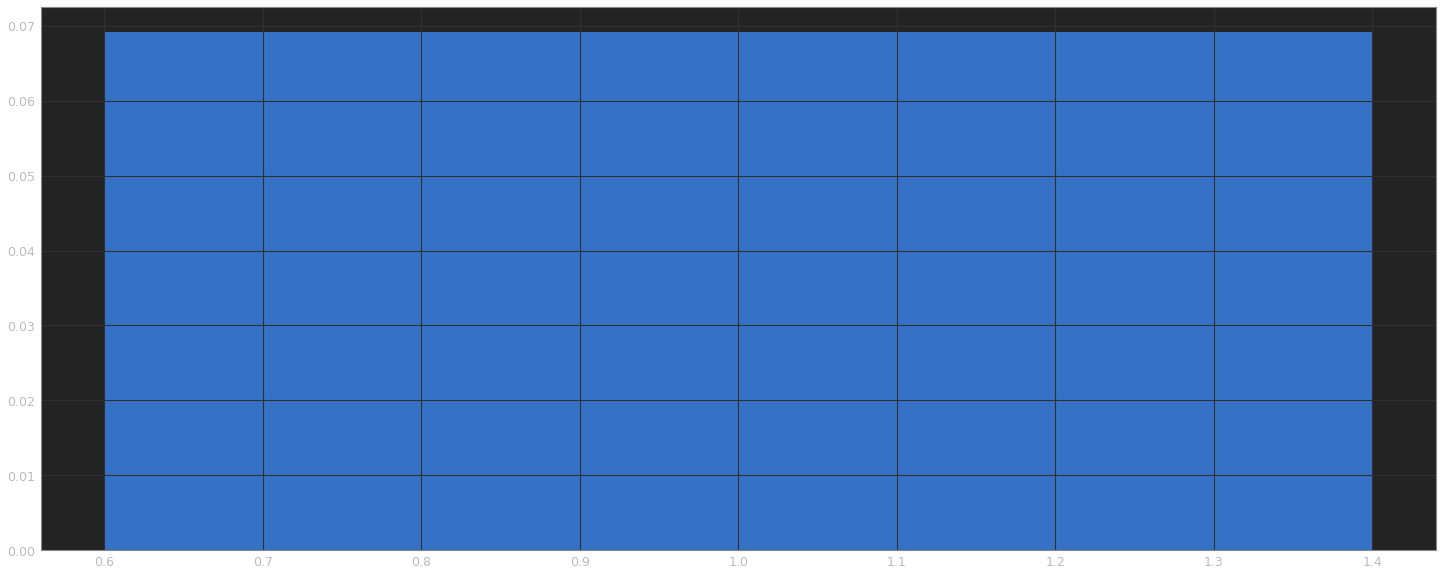

CPU times: user 899 ms, sys: 3.63 ms, total: 903 ms
Wall time: 1.45 s


In [44]:
%%time
Xgbcl = xgb.XGBRFClassifier()
#Xgbreg = xgb.XGBRFRegressor()

paramsRS = {"objective":["binary:logistic", "reg:logistic"], 
            "n_estimators": range(20,2000,40),
             'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.07,0.08,0.1,0.12,0.15,0.15,0.2,0.22,0.25,0.27,0.3,0.35,0.4],
             "max_depth":range(2,8), 
             'min_child_weight':range(1,4,1), 
             "booster":["gbtree"],
             'gamma': np.arange(0.0,4,0.2),
             'reg_alpha' : np.arange(0.0,2,0.1), 
             'reg_lambda' : np.arange(0.0,3,0.1),
             'num_parallel_tree': [1,2,3,5,8,10,15,20,40,80]}
            


xgcl_search = RandomizedSearchCV(Xgbreg, param_distributions = {}, cv= 4, n_iter= 1, n_jobs = 4)
xgcl_search.fit(x_train,y_train)
print(xgcl_search.best_params_)

print('test score: ',xgcl_search.best_score_,'\n\n')

plt.figure(figsize=(25,10))
plt.bar(xgcl_search.cv_results_['rank_test_score'],xgcl_search.cv_results_['mean_test_score'], data=xgcl_search.cv_results_['mean_fit_time'])
plt.grid(True)
plt.show()

In [ ]:
%%time
Xgbcl = xgb.XGBRFClassifier()
#Xgbreg = xgb.XGBRFRegressor()

paramsRS = {"objective":["binary:logistic", "reg:logistic"], 
            "n_estimators": range(20,2000,40),
             'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.07,0.08,0.1,0.12,0.15,0.15,0.2,0.22,0.25,0.27,0.3,0.35,0.4],
             "max_depth":range(2,8), 
             'min_child_weight':range(1,4,1), 
             "booster":["gbtree"],
             'gamma': np.arange(0.0,4,0.2),
             'reg_alpha' : np.arange(0.0,2,0.1), 
             'reg_lambda' : np.arange(0.0,3,0.1),
             'num_parallel_tree': [1,2,3,5,8,10,15,20,40,80]}
            

xgcl_search = RandomizedSearchCV(Xgbreg, param_distributions = paramsRS, cv= 4, n_iter= 100, n_jobs = 4)
xgcl_search.fit(x_train,y_train)
print(xgcl_search.best_params_)

print('test score: ',xgcl_search.best_score_,'\n\n')

plt.figure(figsize=(25,10))
plt.bar(xgcl_search.cv_results_['rank_test_score'],xgcl_search.cv_results_['mean_test_score'], data=xgcl_search.cv_results_['mean_fit_time'])
plt.grid(True)
plt.show()

#### Zapisanie modelu wyliczonego z dev_df

In [ ]:
pkl_filename = "model.pickle"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

#### W celu pobrania modelu z pliku wystarczy tyle:

In [ ]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

#### Sprawdzenie czy się poprawnie otworzył

In [ ]:
pickle_model
y_pred = pickle_model.predict(x_test)
    
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
score = pickle_model.score(x_train,y_train) 
mse, mae, r2score, score